In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [7]:
# Store filepath in a variable
before_covid_data = "output_data/before_covid.csv"
before_covid_df = pd.read_csv(before_covid_data, encoding="UTF-8")
before_covid_df.head(5)
before_covid_df['tot_cases']=0
before_covid_df['tot_death']=0
after_covid_data = "output_data/after_covid.csv"
after_covid_df = pd.read_csv(after_covid_data, encoding="UTF-8")

In [9]:
consolidated_covid_df=after_covid_df.append(before_covid_df)
consolidated_covid_df['total_population']=consolidated_covid_df['Population Staying at Home'] + consolidated_covid_df['Population Not Staying at Home']             
consolidated_covid_df['tot_cases%']=consolidated_covid_df['tot_cases']/consolidated_covid_df['total_population'] * 100
consolidated_covid_df['tot_death%']=consolidated_covid_df['tot_death']/consolidated_covid_df['total_population'] * 100
consolidated_covid_df['Population Staying at Home%']=consolidated_covid_df['Population Staying at Home']/consolidated_covid_df['total_population'] * 100
consolidated_covid_df['Population Not Staying at Home%']=consolidated_covid_df['Population Not Staying at Home']/consolidated_covid_df['total_population'] * 100
consolidated_covid_df.sort_values(by=['Date'], inplace=True, ascending=True)
consolidated_covid_df.to_csv('output_data/consolidated_new.csv', index=False)
consolidated_covid_df.head(3)

,state,tot_cases,new_case,tot_death,new_death,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%
48,MO,0,NaN,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,4033851.0,...,809030.0,290444.0,154169.0,39949.0,29170.0,6107725.0,0.0,0.0,25.062769,74.937231
27,LA,0,NaN,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,3737562.0,...,530891.0,249210.0,97879.0,22007.0,14093.0,4645731.0,0.0,0.0,22.439332,77.560668
28,AZ,0,NaN,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,5351386.0,...,865350.0,278933.0,190394.0,39342.0,43397.0,7149726.0,0.0,0.0,24.071216,75.928784


In [168]:
path = "output_data/consolidated_new.csv"
consolidated_covid_df = pd.read_csv(path, encoding="UTF-8")

CA_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'CA')]
VT_df = consolidated_covid_df.loc[(consolidated_covid_df['state'] == 'VT')]


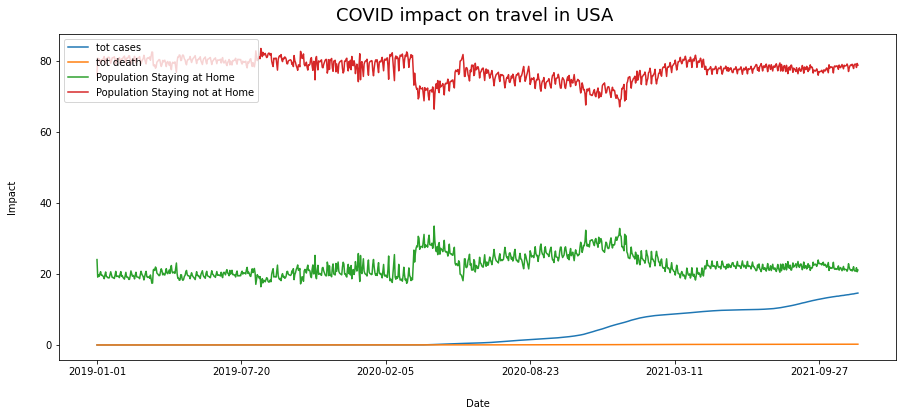

In [169]:
N1 = consolidated_covid_df.groupby("Date",as_index = False)["tot_cases%"].mean() 
N1_df = pd.DataFrame(N1)

N2 = consolidated_covid_df.groupby("Date",as_index = False)['tot_death%'].mean() 
N2_df = pd.DataFrame(N2)

N3 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Staying at Home%'].mean() 
N3_df = pd.DataFrame(N3)

N4 =  consolidated_covid_df.groupby("Date",as_index = False)['Population Not Staying at Home%'].mean() 
N4_df = pd.DataFrame(N4)

N1_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="tot cases")
N2_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="tot death")
N3_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Population Staying at Home")
N4_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Population Staying not at Home")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in USA ",y=1.02,fontsize=18)
plt.show()


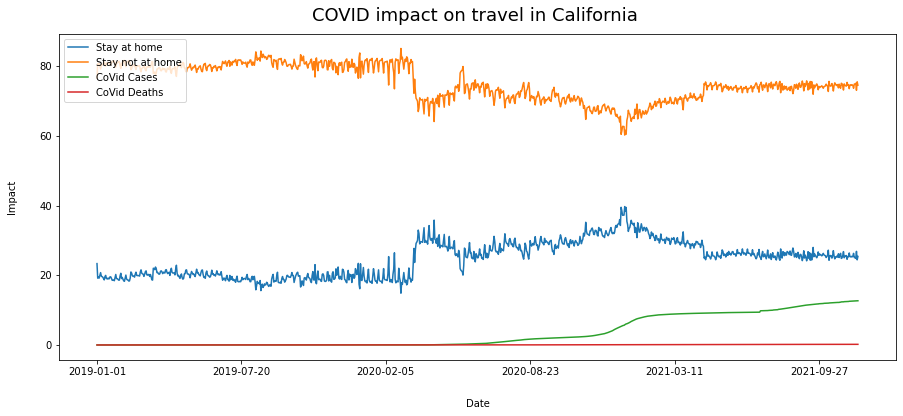

In [170]:
CA_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
CA_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
CA_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
CA_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in California ",y=1.02,fontsize=18)
plt.show()

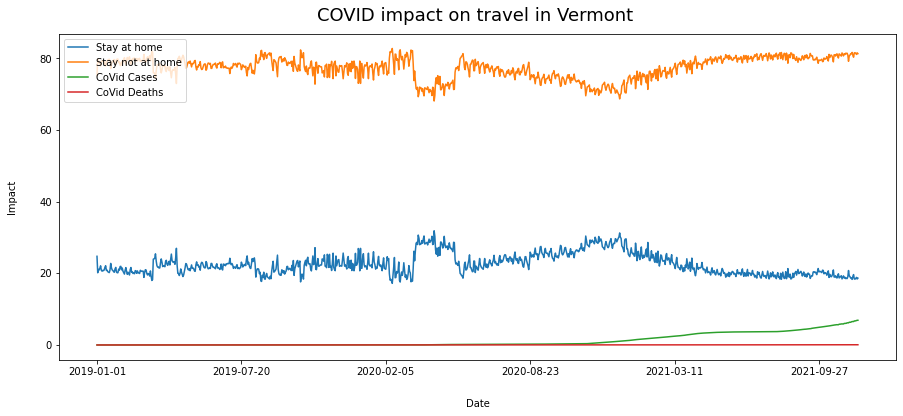

In [74]:
VT_df.set_index('Date')['Population Staying at Home%'].plot(figsize =(15,6),label="Stay at home")
VT_df.set_index('Date')['Population Not Staying at Home%'].plot(figsize =(15,6),label="Stay not at home")
VT_df.set_index('Date')['tot_cases%'].plot(figsize =(15,6),label="CoVid Cases")
VT_df.set_index('Date')['tot_death%'].plot(figsize =(15,6),label="CoVid Deaths")

plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on travel in Vermont ",y=1.02,fontsize=18)
plt.show()

In [171]:
#2) Plot 2: State Specific Bar Graph showing travel before / travel after (FL - 80% / 60% "pop not stay at home"), potentially all 50 states
# Create bins for before covid and after covid
#df['color'] = np.where(df['Set']=='Z', 'green', 'red')

consolidated_covid_df["covid_status"] = np.where(consolidated_covid_df["Date"]>'2020/01/21',"after","before")

consolidated_covid_df

,state,tot_cases,tot_death,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,tot_cases%,tot_death%,Population Staying at Home%,Population Not Staying at Home%,covid_status
48,MO,0,0,NaN,2019-01-01,1530765.0,4576960.0,16618431.0,4033851.0,4385048.0,...,290444.0,154169.0,39949.0,29170.0,6107725.0,0.000000,0.000000,25.062769,74.937231,before
27,LA,0,0,NaN,2019-01-01,1042471.0,3603260.0,13635299.0,3737562.0,3653640.0,...,249210.0,97879.0,22007.0,14093.0,4645731.0,0.000000,0.000000,22.439332,77.560668,before
28,AZ,0,0,NaN,2019-01-01,1721026.0,5428700.0,18705619.0,5351386.0,4462153.0,...,278933.0,190394.0,39342.0,43397.0,7149726.0,0.000000,0.000000,24.071216,75.928784,before
29,AR,0,0,NaN,2019-01-01,642665.0,2361951.0,7488494.0,1715475.0,2086803.0,...,154771.0,67697.0,16563.0,7904.0,3004616.0,0.000000,0.000000,21.389256,78.610744,before
30,CA,0,0,NaN,2019-01-01,9212440.0,30223696.0,111648618.0,33567702.0,28725797.0,...,2111397.0,750377.0,178478.0,214788.0,39436136.0,0.000000,0.000000,23.360402,76.639598,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,SD,162375,2305,State,2021-11-20,171947.0,712712.0,3636567.0,1091024.0,941422.0,...,100882.0,49912.0,5480.0,2510.0,884659.0,18.354530,0.260552,19.436529,80.563471,after
28682,CA,5014428,73000,State,2021-11-20,10043294.0,29468929.0,123467116.0,34174699.0,30188930.0,...,2787076.0,1054817.0,234871.0,134765.0,39512223.0,12.690827,0.184753,25.418195,74.581805,after
23279,OH,1639070,26063,State,2021-11-20,2448434.0,9240666.0,52206417.0,15961931.0,13004018.0,...,785995.0,319374.0,45441.0,29849.0,11689100.0,14.022209,0.222968,20.946300,79.053700,after
19671,UT,582929,3428,State,2021-11-20,716625.0,2489333.0,12783889.0,3492150.0,3406699.0,...,225500.0,99433.0,29599.0,16726.0,3205958.0,18.182677,0.106926,22.352913,77.647087,after


In [172]:
x = consolidated_covid_df.groupby(["state","covid_status"],as_index = False)['Number of Trips'].sum()
covid_vs_trips_df = pd.DataFrame(x)

In [173]:
covid_vs_trips_df

,state,covid_status,Number of Trips
0,AK,after,9.103217e+08
1,AK,before,2.007567e+09
2,AL,after,5.675018e+09
3,AL,before,1.189436e+10
4,AR,after,3.404353e+09
...,...,...,...
97,WI,before,1.520846e+10
98,WV,after,2.109076e+09
99,WV,before,4.455022e+09
100,WY,after,8.282265e+08


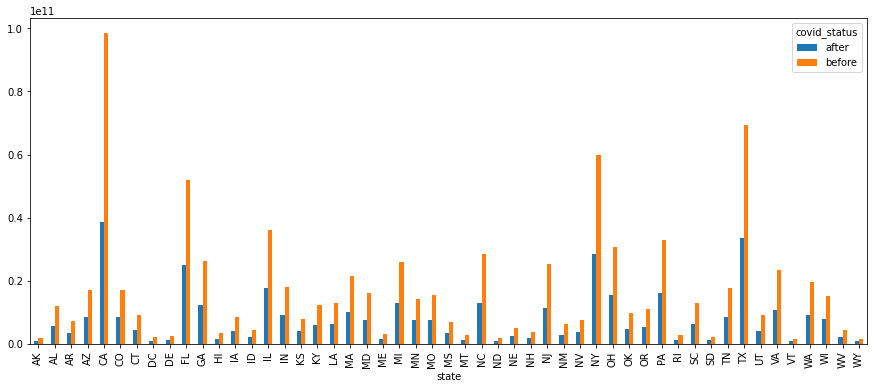

In [174]:
covid_vs_trips_df.pivot("state", "covid_status", "Number of Trips").plot(kind='bar',figsize =(15,6))

plt.show()

In [139]:
national_trip_data = "output_data/national_covid.csv"

In [140]:
national_trip_data = pd.read_csv(national_trip_data, encoding="UTF-8")

In [141]:
national_trip_data

,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2019/01/01,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0
1,2019/01/02,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0
2,2019/01/03,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0
3,2019/01/04,61803652.0,264363768.0,1.181954e+09,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0
4,2019/01/05,64389745.0,261777675.0,1.180477e+09,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2021/11/16,70666095.0,257573428.0,1.422332e+09,422971622.0,347569809.0,163055860.0,204335363.0,193540842.0,60770560.0,19271631.0,7869865.0,1718347.0,1228392.0
1051,2021/11/17,70574570.0,257664953.0,1.479584e+09,445753387.0,366818268.0,168524802.0,208627236.0,197022938.0,61932963.0,19783029.0,8117723.0,1753566.0,1249879.0
1052,2021/11/18,73652360.0,254587163.0,1.292774e+09,371718902.0,313351056.0,149167497.0,189716076.0,182150488.0,57863078.0,18482503.0,7544739.0,1618055.0,1161865.0
1053,2021/11/19,69922037.0,258317486.0,1.455510e+09,431065435.0,354953324.0,166412148.0,207986642.0,196890342.0,62422373.0,21719535.0,10593977.0,2149691.0,1316162.0


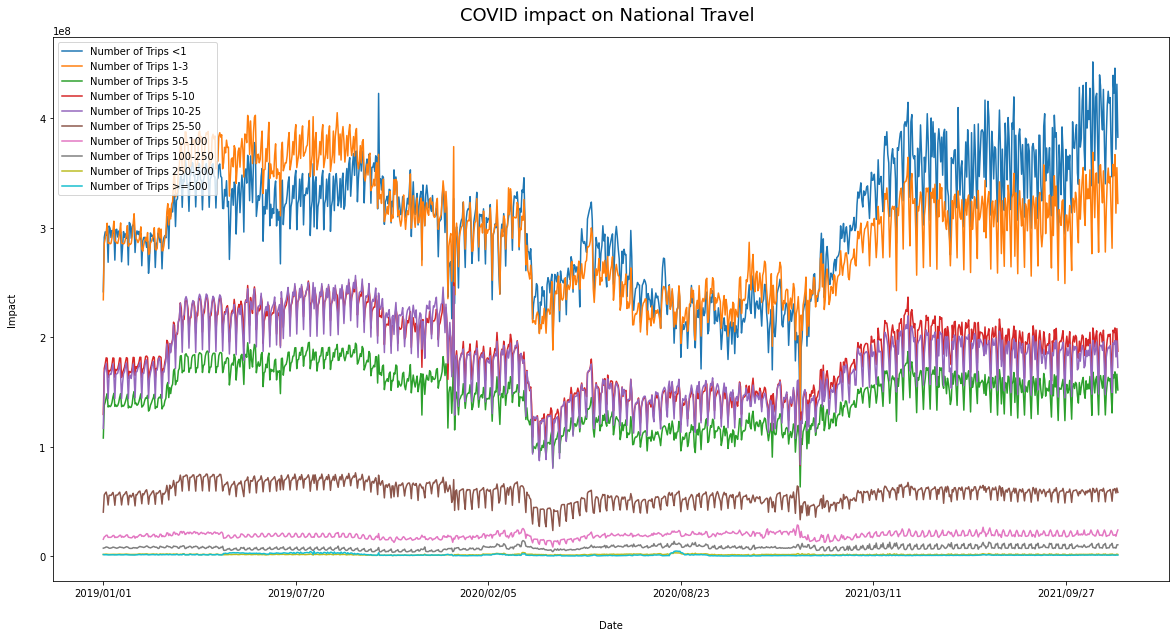

In [175]:
national_trip_data.set_index('Date')['Number of Trips <1'].plot(figsize =(20,10),label="Number of Trips <1")
national_trip_data.set_index('Date')['Number of Trips 1-3'].plot(figsize =(20,10),label="Number of Trips 1-3")
national_trip_data.set_index('Date')['Number of Trips 3-5'].plot(figsize =(20,10),label="Number of Trips 3-5")
national_trip_data.set_index('Date')['Number of Trips 5-10'].plot(figsize =(20,10),label="Number of Trips 5-10")
national_trip_data.set_index('Date')['Number of Trips 10-25'].plot(figsize =(20,10),label="Number of Trips 10-25")
national_trip_data.set_index('Date')['Number of Trips 25-50'].plot(figsize =(20,10),label="Number of Trips 25-50")
national_trip_data.set_index('Date')['Number of Trips 50-100'].plot(figsize =(20,10),label="Number of Trips 50-100")
national_trip_data.set_index('Date')['Number of Trips 100-250'].plot(figsize =(20,10),label="Number of Trips 100-250")
national_trip_data.set_index('Date')['Number of Trips 250-500'].plot(figsize =(20,10),label="Number of Trips 250-500")
national_trip_data.set_index('Date')['Number of Trips >=500'].plot(figsize =(20,10),label="Number of Trips >=500")


plt.legend(loc="upper left")

plt.ylabel("Impact",labelpad = 22)
plt.xlabel("Date",labelpad = 22)

plt.title("COVID impact on National Travel ",y=1.02,fontsize=18)
plt.show()